# Car Features and MSRP Dataet

- `Number of Instances`: **11914**
- `Number of Attributes`: **16**
- `Attributes`(Description of Attributes, according to me which I got from dicussions and Google beacuse it was not given in the https://www.kaggle.com/CooperUnion/cardataset page): 
  - `Make`: Make of a car(BMW, Volkswagen and so on)
  - `Model`: Model of a car
  - `Year`: Year when the car was manufactured
  - `Engine Fuel Type`: Type of fuel engine needs(disel and so on)
  - `Engine HP`: Horsepower of engine
  - `Engine Cylinders`: Number of cylinders in engine
  - `Transmission Type`: Type of transmission(automatic or manual)
  - `Driven Wheels`: front, rear, all
  - `Number of Doors`: Number of doors a car has
  - `Market Category`: luxury, crossover and so on
  - `Vehicle Size`: compact, midsize, large
  - `Vehicle Style`: Style of vehicle(sedan, convertible and so on)
  - `Highway MPG`: miles per gallon(MPG) in highway
  - `City MPG`: miles per gallon(MPG) in city
  - `Popularity`: Number of times the car was mentioned in a Twitter stream
  - `MSRP`: Manufacturer's Suggested Retail Price

## 1. Understand the Business Requirements

**Problem statement:**

`Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.`

## 2. Collecting Data

`which was given in .csv file from Kaggle website(link was attached above).`

## 3. Exploratory Data Analysis(EDA)

1. `Checking for Data type of columns`
2. `Checking out the Correlation Matrix`
3. `Segregating the categorical and numerical features from dataframe`
4. `Outlier Analysis`

**~> IT IS ALREADY DONE IN Car Price Prediction (1st trial).ipynb**

## 4. Feature Engineering and Scaling (for Final)

1. `Segregating the target variable`
2. `Imputing Missing Values: used 0`
3. `Removing Outliers: not removed`
4. `One-Hot Encoding the Categorical columns: for some columns`
5. `Feature Scaling`

In [3]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv('archive.zip')
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#lowercasing all the column names and replacing space with underscores
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')
#similary lowercasing all the rows and replacing space with underscores
string_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)
for col in string_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

In [14]:
def cat_preparing_X(df):
    """
    Trying some more simple feature engineering.
    """
    df = df.copy()
    features = []
    
    for index in ['chevrolet', 'ford', 'volkswagen', 'toyota']:
        feature = 'is_make_%s' % index 
        df[feature] = (df['make'] == index).astype(int)
        features.append(feature)
        
    for index in ['regular_unleaded', 'premium_unleaded_(required)',
                  'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % index
        df[feature] = (df['engine_fuel_type'] == index).astype(int)
        features.append(feature)
    
    for index in ['automatic', 'manual', 'automated_manual', 'direct_drive']:
        feature = 'is_tranmission_%s' % index
        df[feature] = (df['transmission_type'] == index).astype(int)
        features.append(feature)
    
    for index in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance']:
        feature = 'is_market_category_%s' % index
        df[feature] = (df['market_category'] == index).astype(int)
        features.append(feature)

    df = df[features]
    df = df.fillna(0)
    return df

In [15]:
#segregating the categorical from the dataframe
cat_vars = ['object']
cat_df = car_df.select_dtypes(include=cat_vars)
cat_df.head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible


In [16]:
cat_df = cat_preparing_X(cat_df)
cat_df.head()

,is_make_chevrolet,is_make_ford,is_make_volkswagen,is_make_toyota,is_type_regular_unleaded,is_type_premium_unleaded_(required),is_type_premium_unleaded_(recommended),is_type_flex-fuel_(unleaded/e85),is_tranmission_automatic,is_tranmission_manual,is_tranmission_automated_manual,is_tranmission_direct_drive,is_market_category_crossover,is_market_category_flex_fuel,is_market_category_luxury,"is_market_category_luxury,performance"
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [17]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   is_make_chevrolet                       11914 non-null  int32
 1   is_make_ford                            11914 non-null  int32
 2   is_make_volkswagen                      11914 non-null  int32
 3   is_make_toyota                          11914 non-null  int32
 4   is_type_regular_unleaded                11914 non-null  int32
 5   is_type_premium_unleaded_(required)     11914 non-null  int32
 6   is_type_premium_unleaded_(recommended)  11914 non-null  int32
 7   is_type_flex-fuel_(unleaded/e85)        11914 non-null  int32
 8   is_tranmission_automatic                11914 non-null  int32
 9   is_tranmission_manual                   11914 non-null  int32
 10  is_tranmission_automated_manual         11914 non-null  int32
 11  is_tranmission_

In [7]:
#segregating the numerical columns from the dataframe
numerics = ['int64', 'float64']
num_df = car_df.select_dtypes(include=numerics)
num_df = num_df.drop(['msrp'], axis=1) #dropping target variable
cols = num_df.columns
num_df['year'] = 2017 - num_df['year']
num_df.fillna(0, inplace=True)
num_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,6,335.0,6.0,2.0,26,19,3916
1,6,300.0,6.0,2.0,28,19,3916
2,6,300.0,6.0,2.0,28,20,3916
3,6,230.0,6.0,2.0,28,18,3916
4,6,230.0,6.0,2.0,28,18,3916


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_df = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_df, columns=cols)

In [10]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,0.245025,0.280731,0.0,0.037037,0.074074,0.370370,1.0
engine_hp,11914.0,0.247694,0.110397,0.0,0.169830,0.224775,0.299700,1.0
engine_cylinders,11914.0,0.350916,0.112535,0.0,0.250000,0.375000,0.375000,1.0
number_of_doors,11914.0,0.858591,0.221115,0.0,0.500000,1.000000,1.000000,1.0
highway_mpg,11914.0,0.042800,0.025915,0.0,0.029240,0.040936,0.052632,1.0
city_mpg,11914.0,0.097948,0.069137,0.0,0.069231,0.084615,0.115385,1.0
popularity,11914.0,0.274609,0.254970,0.0,0.096729,0.244562,0.354907,1.0


In [18]:
X = pd.concat([num_df, cat_df], axis=1)
y = np.log1p(car_df['msrp'].values)

In [19]:
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,is_make_chevrolet,is_make_ford,is_make_volkswagen,...,is_type_premium_unleaded_(recommended),is_type_flex-fuel_(unleaded/e85),is_tranmission_automatic,is_tranmission_manual,is_tranmission_automated_manual,is_tranmission_direct_drive,is_market_category_crossover,is_market_category_flex_fuel,is_market_category_luxury,"is_market_category_luxury,performance"
0,0.222222,0.334665,0.375,0.5,0.040936,0.092308,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.222222,0.299700,0.375,0.5,0.046784,0.092308,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.222222,0.299700,0.375,0.5,0.046784,0.100000,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split #split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0708435884913987

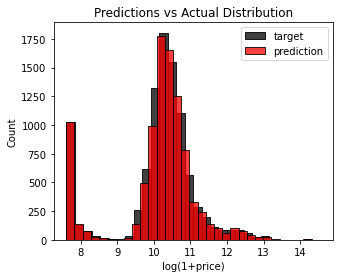

In [25]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();

In [26]:
#CV
forest_reg_cv_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

0.11624513432437115

# 6. Hyperparameter Tuning

In [27]:
#hyper tuning of RF
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', return_train_score=True, cv=10,)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

# 7. Evaluating the entire system on Test Data

In [28]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.1078577761193861

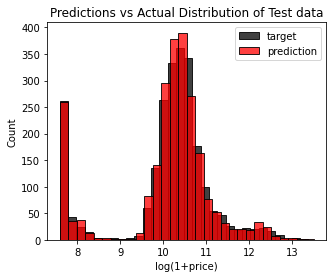

In [29]:
plt.figure(figsize=(5,4))

sns.histplot(y_test, label='target', color='black',bins=30)
sns.histplot(final_predictions, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution of Test data')

plt.show();

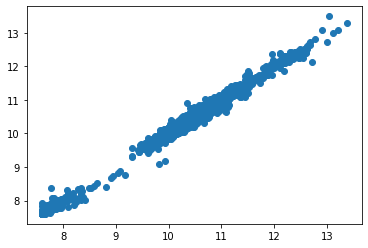

In [30]:
plt.scatter(y_test, final_predictions);

# 8. Save the Model

In [32]:
import pickle 
file = open('model.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(final_model, file) #dump information to that file